In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ann_solver import NeuralNet, pack_params, unpack_params

In [2]:
def psi_trial(x, net):
    return x + x**2 * net.forward(x)

def d_psi_trial(x, net):
    return 1 + 2 * x * net.forward(x) + x**2 * net.derivative(x)

def d2_psi_trial(x, net):
    return 2 * net.forward(x) + 4 * x * net.derivative(x) + x**2 * net.second_derivative(x)

def rhs(x):
    return - (1/5) * np.exp(-x / 5) * np.cos(x)

def residual(x, net):
    psi = psi_trial(x, net)
    dpsi = d_psi_trial(x, net)
    d2psi = d2_psi_trial(x, net)
    return d2psi + (1/5) * dpsi + psi - rhs(x)

def loss_fn(x, net):
    return np.mean(residual(x, net)**2)

In [3]:
def objective(params, net, x):
    unpack_params(net, params)
    return loss_fn(x, net)

def train_net(n_hidden, x_train, activation='sigmoid'):
    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation=activation)
    params0 = pack_params(net)
    result = minimize(objective, params0, args=(net, x_train),
                      method='BFGS', options={'disp': False, 'maxiter': 3000})
    unpack_params(net, result.x)
    return net

In [4]:
x_train = np.linspace(0, np.pi, 50).reshape(-1, 1)
x_test = np.linspace(0, np.pi, 200).reshape(-1, 1)
psi_exact = np.exp(-x_test / 5) * np.sin(x_test)

net = train_net(n_hidden=10, x_train=x_train, activation='sigmoid')

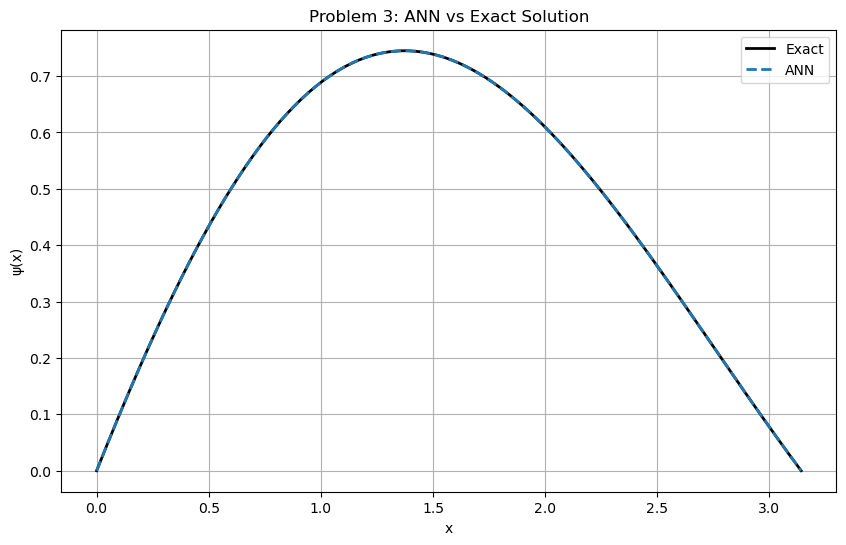

In [5]:
import matplotlib.pyplot as plt

psi_pred = psi_trial(x_test, net).flatten()

plt.figure(figsize=(10, 6))
plt.plot(x_test, psi_exact.flatten(), 'k', label='Exact', linewidth=2)
plt.plot(x_test, psi_pred, '--', label='ANN', linewidth=2)
plt.xlabel('x'); plt.ylabel('ψ(x)')
plt.title("Problem 3: ANN vs Exact Solution")
plt.grid(True) 
plt.legend()
plt.savefig("problem3_ann_vs_exact.png", dpi=300)
plt.show()

In [6]:
def exact_solution(x):
    return np.exp(-x / 5) * np.sin(x)


 Training ANN for Problem 3 with 5 neurons


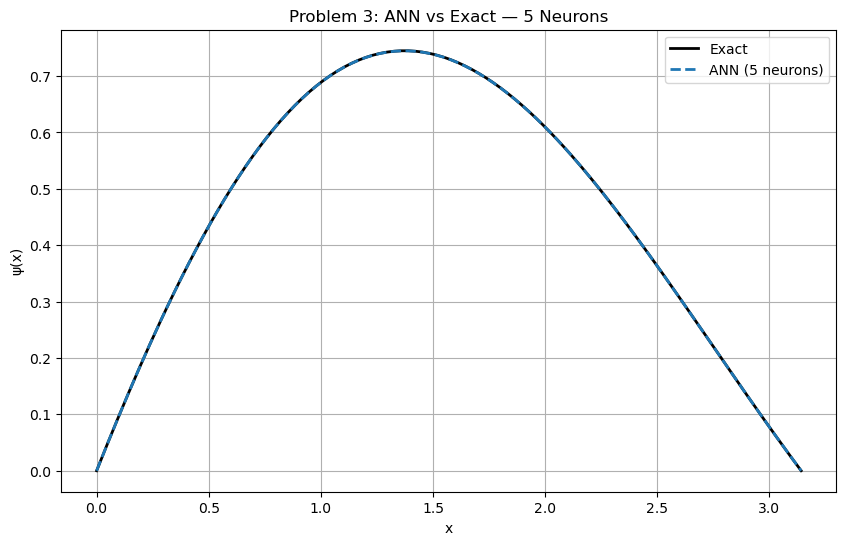

 Residual Loss: 1.023868e-06 |  MSE: 6.360326e-09

 Training ANN for Problem 3 with 10 neurons


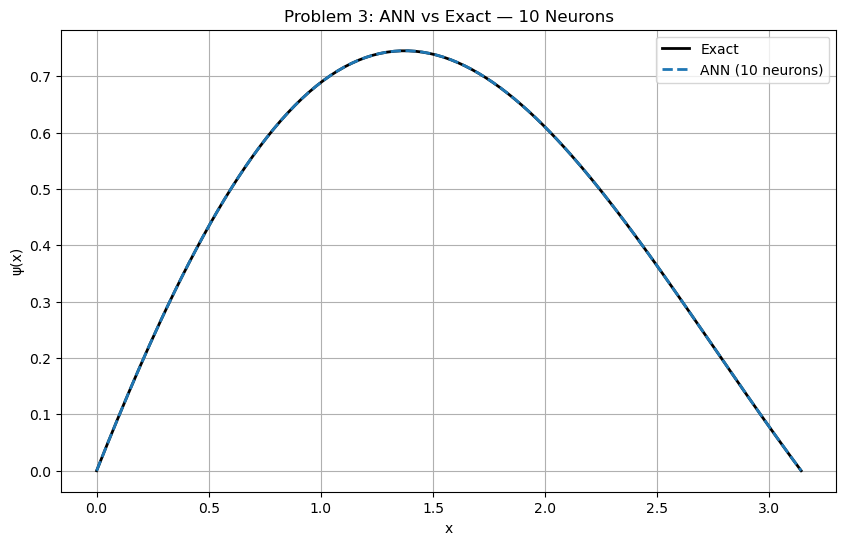

 Residual Loss: 1.195062e-06 |  MSE: 3.239056e-09

 Training ANN for Problem 3 with 20 neurons


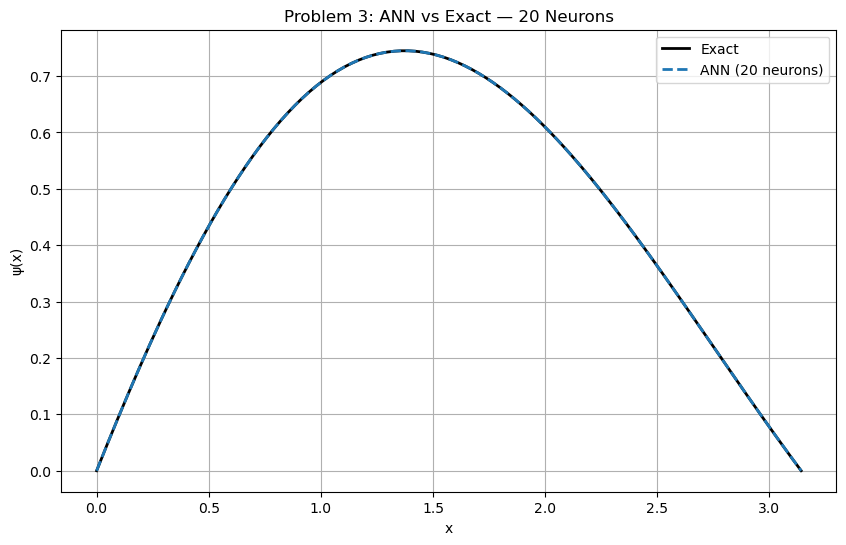

 Residual Loss: 3.970528e-08 |  MSE: 5.389025e-11


In [8]:
x_train = np.linspace(0, np.pi, 50).reshape(-1, 1)
x_test = np.linspace(0, np.pi, 200).reshape(-1, 1)
psi_exact = exact_solution(x_test).flatten()

neurons = [5, 10, 20]

for n_hidden in neurons:
    print(f"\n Training ANN for Problem 3 with {n_hidden} neurons")

    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation='sigmoid')
    params0 = pack_params(net)

    result = minimize(objective, params0, args=(net, x_train),
                      method='BFGS', options={'disp': False, 'maxiter': 3000})
    unpack_params(net, result.x)

    psi_pred = psi_trial(x_test, net).flatten()
    mse = np.mean((psi_pred - psi_exact)**2)
    loss = loss_fn(x_train, net)

    plt.figure(figsize=(10, 6))
    plt.plot(x_test, psi_exact, 'k', label='Exact', linewidth=2)
    plt.plot(x_test, psi_pred, '--', label=f'ANN ({n_hidden} neurons)', linewidth=2)
    plt.title(f"Problem 3: ANN vs Exact — {n_hidden} Neurons")
    plt.xlabel('x')
    plt.ylabel('ψ(x)')
    plt.grid(True)
    plt.legend()
    plt.savefig(f"problem3_exact_vs_ann_{n_hidden}_neurons.png", dpi=300)
    plt.show()

    print(f" Residual Loss: {loss:.6e} |  MSE: {mse:.6e}")
